In [20]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('C:\\Users\\megha\\OneDrive\\Desktop\\ml projects\\Churn_Modelling.csv')

In [22]:
#print first 5 rows
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
data.shape

(10000, 14)

In [25]:
# Identify missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)




Missing values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [28]:
#Checking for inconsistencies in categorical data
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Surname': ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Unique values in 'Geography': ['France' 'Spain' 'Germany']
Unique values in 'Gender': ['Female' 'Male']


In [29]:
# Label Encoding for required categorical column
data=data.drop(columns=["Surname","RowNumber","CustomerId"])
categorical_columns.remove("Surname")
label_encoder = LabelEncoder()
for column in categorical_columns:
  data[column] = label_encoder.fit_transform(data[column])
# Display the first few rows of the cleaned dataframe
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [31]:
# Detect outliers using Z-score
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop(["Age"])
z_scores = stats.zscore(data[numerical_cols])

# Keep rows where the Z-score is within ±3 for all numerical columns
data_clean = data[(abs(z_scores) < 3).all(axis=1)]
data.shape, data_clean.shape



((10000, 11), (9932, 11))

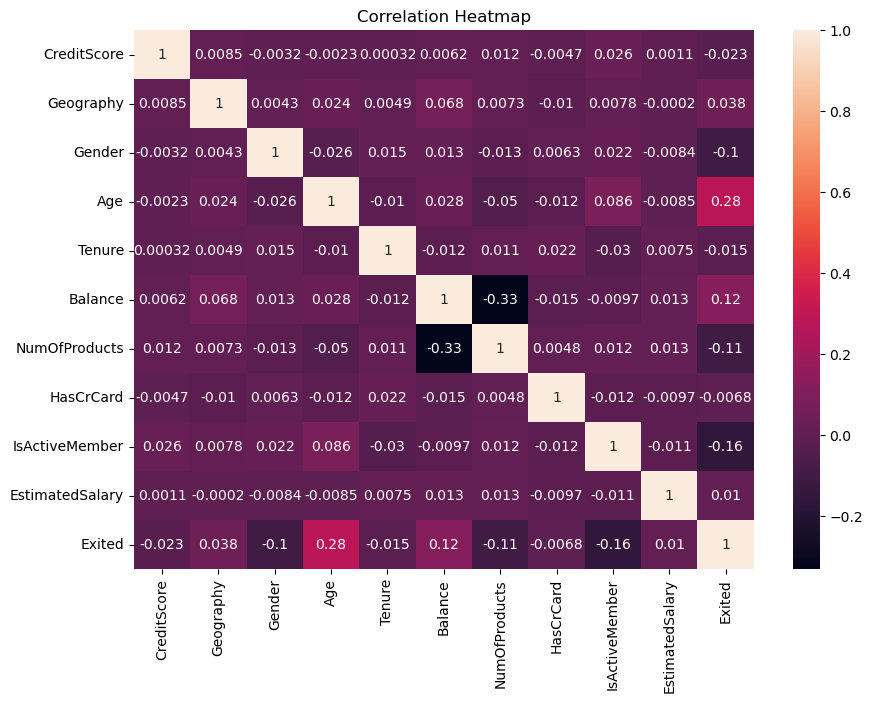

In [32]:

# Correlation heatmap
plt.figure(figsize=(10,7))
correlation_matrix = data_clean.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [37]:
from sklearn.preprocessing import  MinMaxScaler
num_list = list(numerical_cols)
num_list.append("Age")

# Min-Max Scaling
scaler_min_max = MinMaxScaler()
scaled_features_min_max = scaler_min_max.fit_transform(df_clean[num_list])
df_clean.loc[:, num_list] = scaled_features_min_max
df_clean.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.525667,0,0,0.324324,0.2,0.000000,0.0,1,1,0.506735,1
1,0.503080,2,0,0.310811,0.1,0.334031,0.0,0,1,0.562709,0
2,0.285421,0,0,0.324324,0.8,0.636357,1.0,1,0,0.569654,1
3,0.689938,0,0,0.283784,0.1,0.000000,0.5,0,0,0.469120,0
4,1.000000,2,0,0.337838,0.2,0.500246,0.0,1,1,0.395400,0


In [45]:
pca = PCA(n_components=4)  # Adjust the number of components as needed
principal_components = pca.fit_transform(df_clean[num_list])
df_pca = pd.DataFrame(data=principal_components)
# Explained variance
print(pca.explained_variance_ratio_)

[0.26550403 0.21219277 0.15822685 0.09068053]


In [39]:
from sklearn.feature_selection import SelectKBest, chi2

# Apply feature selection
X = df_clean.drop(['Exited'], axis=1)
y = df_clean['Exited']
selector = SelectKBest(score_func=chi2, k=5)  # Select top 5 features
selector.fit(X, y)
selected_features = selector.get_support(indices=True)
df_selected = df_clean.iloc[:, selected_features]

Exited
0    7963
1    1969
Name: count, dtype: int64


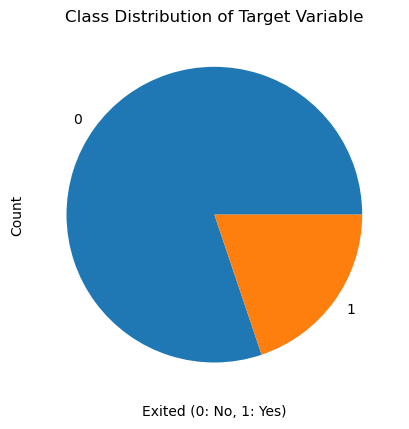

In [42]:
#visualization class Imabalance
# Calculate the distribution of the target variable
class_counts = df_clean['Exited'].value_counts()
print(class_counts)

# Visualization of distribution
class_counts.plot(kind='pie', color=['pink', 'blue'])
plt.title('Class Distribution of Target Variable')
plt.xlabel('Exited (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()


In [48]:
# Calculate class imbalance ratio
class_0_count = class_counts[0]
class_1_count = class_counts[1]
imbalance_ratio = class_0_count / class_1_count
print(f"Class 0 (Not Churned): {class_0_count}")
print(f"Class 1 (Churned): {class_1_count}")
print(f"Imbalance Ratio (Class 0 / Class 1): {imbalance_ratio:.2f}")


Class 0 (Not Churned): 7963
Class 1 (Churned): 1969
Imbalance Ratio (Class 0 / Class 1): 4.04


In [50]:
#If the imbalance ratio is significantly higher than 1, it indicates that the dataset is imbalanced
# If imbalance exists, handle class imbalance using SMOTE
if imbalance_ratio > 1.5:  # Example threshold to determine if imbalance handling is necessary
    from imblearn.over_sampling import SMOTE

    # Apply SMOTE to balance the classes
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, y)

    print(f"Original target distribution: {y.value_counts()}")
    print(f"Resampled target distribution: {pd.Series(y_resampled).value_counts()}")

Original target distribution: Exited
0    7963
1    2037
Name: count, dtype: int64
Resampled target distribution: Exited
1    7963
0    7963
Name: count, dtype: int64
